In [1]:
library(plyr)
library(ggplot2)
library(data.table, lib="~/Rpackages")
library(Rmisc, lib = "~/Rpackages")
library(dplyr)
library(broom)

Loading required package: lattice

Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [8]:
#### ONEFILL ####

#Working directory for datasets varying migration rate and bottleneck proportion 
setwd('/scratch/research/projects/trifolium/SEC_Simulation.Evolutionary.Clines/SEC_Data/drift-migration/1D/AlleleFreq_Vary/one-fill/')

#Load datasets that will be used for analyses
datSlopes_OneFill <- fread('20171016_SlopeSum_Gen_AlleleFreq-Merged.csv', header = T)
datSlopes_OneFill$pA_start <- as.factor(as.character(datSlopes_OneFill$pA_start))
datSlopes_OneFill$pB_start <- as.factor(as.character(datSlopes_OneFill$pB_start))
datSlopes_OneFill$AlleleFreqs <- paste(datSlopes_OneFill$pA_start, datSlopes_OneFill$pB_start, sep = "-")
datSlopes_OneFill$AlleleFreqs <- as.factor(as.character(datSlopes_OneFill$AlleleFreqs))
datSlopes_OneFill$AlleleFreqs <- factor(datSlopes_OneFill$AlleleFreqs, levels=c("0.1-0.1", "0.1-0.5", "0.5-0.1", "0.1-0.9", 
                                                                "0.9-0.1", "0.5-0.5", "0.5-0.9", "0.9-0.5", 
                                                                "0.9-0.9"))


#Data subsets
datSlopes_OneFill_GenOne <- subset(datSlopes_OneFill, seq == "1")
# datFreqFirst_bot001_NoMig <- subset(datFreqFirst, bot == "0.01" & Mig_rate == "0")
# datFreqFirst_bot02_NoMig <- subset(datFreqFirst, bot == "0.2" & Mig_rate == "0")
# datFreqFirst_bot001_HighMig <- subset(datFreqFirst, bot == "0.01" & Mig_rate == "0.05")

#### ALLFILL ####

#Working directory for datasets varying migration rate and bottleneck proportion
setwd('/scratch/research/projects/trifolium/SEC_Simulation.Evolutionary.Clines/SEC_Data/drift-migration/1D/AlleleFreq_Vary/all-fill/')

#Load datasets that will be used for analyses
datSlopes_AllFill <- fread('20171021_SlopeSum_Gen_AlleleFreq-Allfill_Merged.csv', header = T)
datSlopes_AllFill$pA_start <- as.factor(as.character(datSlopes_AllFill$pA_start))
datSlopes_AllFill$pB_start <- as.factor(as.character(datSlopes_AllFill$pB_start))
datSlopes_AllFill$AlleleFreqs <- paste(datSlopes_AllFill$pA_start, datSlopes_AllFill$pB_start, sep = "-")
datSlopes_AllFill$AlleleFreqs <- as.factor(as.character(datSlopes_AllFill$AlleleFreqs))
datSlopes_AllFill$AlleleFreqs <- factor(datSlopes_AllFill$AlleleFreqs, levels=c("0.1-0.1", "0.1-0.5", "0.5-0.1", "0.1-0.9", 
                                                                "0.9-0.1", "0.5-0.5", "0.5-0.9", "0.9-0.5", 
                                                                "0.9-0.9"))


#Data subsets
datSlopes_AllFill_LastGen <- subset(datSlopes_AllFill, seq == "250")

In [5]:
#Themes used for plotting
ng1=theme(aspect.ratio=0.7,panel.background = element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          panel.border=element_blank(),
          axis.line.x = element_line(color="black",size=1), 
          axis.line.y = element_line(color="black",size=1),
          axis.ticks=element_line(color="black"), 
          axis.text=element_text(color="black",size=15), 
          axis.title=element_text(color="black",size=1), 
          axis.title.y=element_text(vjust=2,face="bold",size=15),
          axis.title.x=element_text(vjust=0.1,face="bold",size=15),
          axis.text.x=element_text(size=13),
          axis.text.y=element_text(size=13),
          legend.position = "right", legend.direction="vertical", 
          legend.text=element_text(size=11), legend.key = element_rect(fill = "white"), 
          legend.title = element_text(size=13,face="bold"),legend.key.size = unit(0.5, "cm"))

ng1.45=theme(aspect.ratio=0.7,panel.background = element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          panel.border=element_blank(),
          axis.line.x = element_line(color="black",size=1), 
          axis.line.y = element_line(color="black",size=1),
          axis.ticks=element_line(color="black"), 
          axis.text=element_text(color="black",size=15), 
          axis.title=element_text(color="black",size=1), 
          axis.title.y=element_text(vjust=2,face="bold",size=15),
          axis.title.x=element_text(vjust=0.1,face="bold",size=15),
          axis.text.x=element_text(size=13,angle=45,hjust=1),
          axis.text.y=element_text(size=13),
          legend.position = "right", legend.direction="vertical", 
          legend.text=element_text(size=11), legend.key = element_rect(fill = "white"), 
          legend.title = element_text(size=13,face="bold"),legend.key.size = unit(0.5, "cm"))

# All Fill analysis

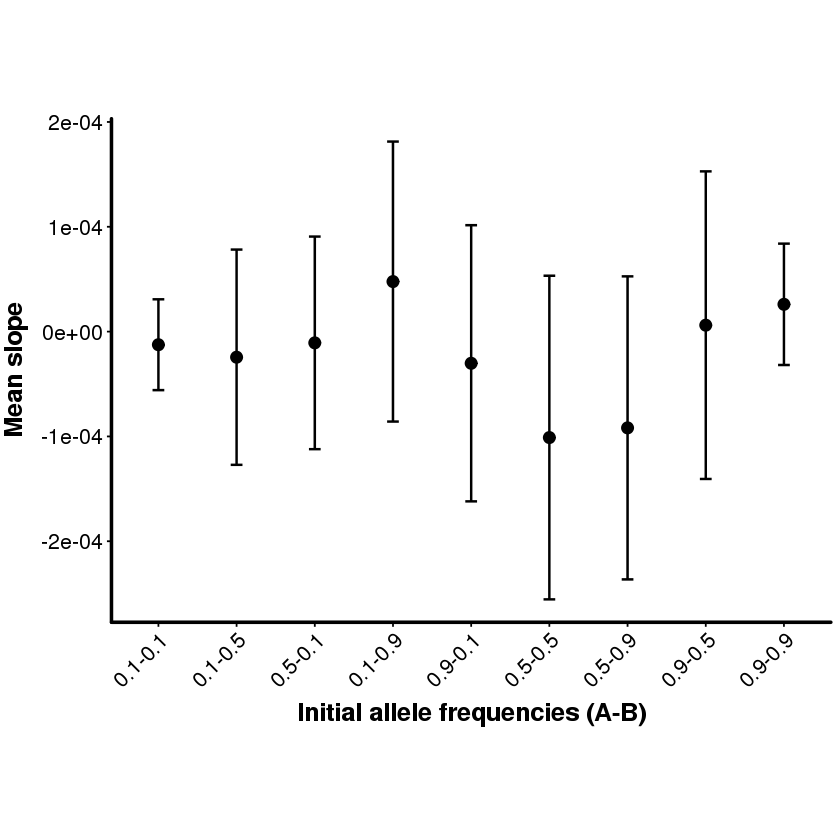

In [9]:
MeanSlope_AlleleFreq_Allfill <- ggplot(datSlopes_AllFill_LastGen, aes(x = AlleleFreqs, y = mean)) + 
    geom_errorbar(aes(ymin = mean - ci_mean, ymax = mean + ci_mean), width=0.15, size=0.7,
    position = position_dodge(width = 0.5)) +
    geom_point(size = 3, position = position_dodge(width = 0.5)) + 
#     geom_line(size = 1, position = position_dodge(width = 0.5)) +
#     scale_shape_manual(labels = c("0", "0.01", "0.05"), values = c(21, 22, 23)) +
#     scale_fill_manual(labels = c("0", "0.01", "0.05"), values = c("white", "grey60", "black")) +
#     scale_linetype_manual(labels = c("0", "0.01", "0.05"), values = c("dotted", "dashed", "solid")) +    
    ylab("Mean slope") + xlab("Initial allele frequencies (A-B)") + ng1.45
MeanSlope_AlleleFreq_Allfill

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


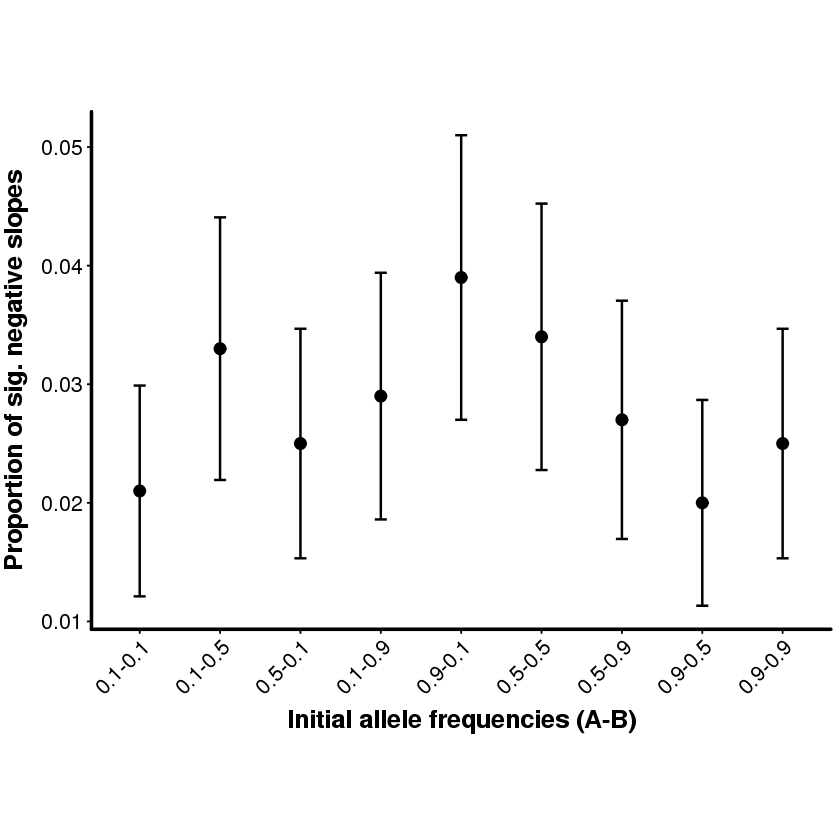

In [10]:
PropSigNeg_AlleleFreq_AllFill <- ggplot(datSlopes_AllFill_LastGen, aes(x = AlleleFreqs, y = prop_sigNeg)) + 
    geom_errorbar(aes(ymin = prop_sigNeg - ci_sigNeg, ymax = prop_sigNeg + ci_sigNeg), width=0.15, size=0.7,
    position = position_dodge(width = 0.5)) +
    geom_point(size = 3, position = position_dodge(width = 0.5)) + 
    geom_line(size = 1, position = position_dodge(width = 0.5)) +
#     scale_shape_manual(labels = c("0", "0.01", "0.05"), values = c(21, 22, 23)) +
#     scale_fill_manual(labels = c("0", "0.01", "0.05"), values = c("white", "grey60", "black")) +
#     scale_linetype_manual(labels = c("0", "0.01", "0.05"), values = c("dotted", "dashed", "solid")) +    
    ylab("Proportion of sig. negative slopes") + xlab("Initial allele frequencies (A-B)")+ ng1.45
PropSigNeg_AlleleFreq_AllFill 

In [11]:
#Extra columns that will be used to create melting dataset for plotting proportion of positive and negative slopes
SlopeSum_AlleleFreq_AllFill_Melt <- dplyr::select(datSlopes_AllFill_LastGen, AlleleFreqs, pA_start, pB_start, prop_sigPos, ci_sigPos, prop_sigNeg,
  ci_sigNeg)

#Melt dataframe
dm1 <- melt(datSlopes_AllFill_LastGen[,c("AlleleFreqs", "prop_sigPos", "ci_sigPos")], 
            id=c("AlleleFreqs", "ci_sigPos"))
dm2 <- melt(datSlopes_AllFill_LastGen[,c("AlleleFreqs", "prop_sigNeg", "ci_sigNeg")], 
            id=c("AlleleFreqs", "ci_sigNeg"))

#Rename columns
setnames(dm1, old = c("ci_sigPos"), new = "ci")
setnames(dm2, old = c("ci_sigNeg"), new = "ci")

#Merge melted dataframes
SlopeSum_AlleleFreq_AllFill_Melt <- rbind(dm1, dm2)
SlopeSum_AlleleFreq_AllFill_Melt

AlleleFreqs,ci,variable,value
0.1-0.1,0.010573106,prop_sigPos,0.030
0.1-0.5,0.008461890,prop_sigPos,0.019
0.1-0.9,0.010573106,prop_sigPos,0.030
0.5-0.1,0.009291103,prop_sigPos,0.023
0.5-0.5,0.009676725,prop_sigPos,0.025
0.5-0.9,0.009091527,prop_sigPos,0.022
0.9-0.1,0.009091527,prop_sigPos,0.022
0.9-0.5,0.011699575,prop_sigPos,0.037
0.9-0.9,0.009676725,prop_sigPos,0.025
0.1-0.1,0.008887039,prop_sigNeg,0.021


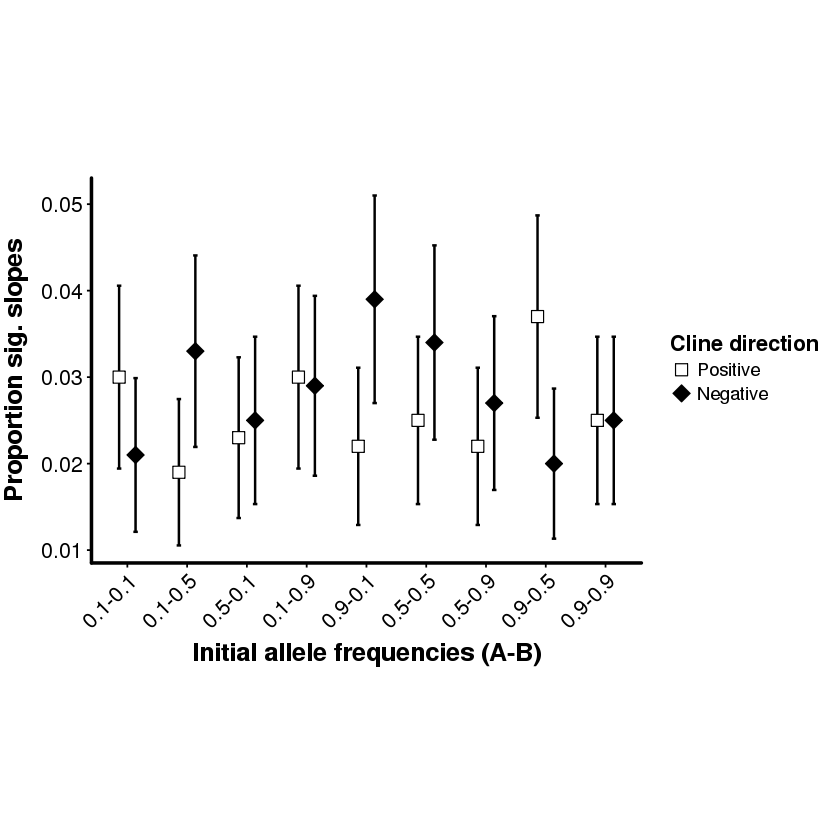

In [13]:
#Plot proportion of significant slopes by migration rate
PropSig_AlleleFreq_AllFill <- ggplot(SlopeSum_AlleleFreq_AllFill_Melt, aes(x = AlleleFreqs, y = value, 
    shape = variable, fill = variable)) + 
    geom_errorbar(aes(ymin = value - ci, ymax = value + ci), width=0.15, size = 0.7, position = position_dodge(width = 0.55)) +
    ylab("Proportion sig. slopes") + xlab("Initial allele frequencies (A-B)") + 
    geom_point(size = 3.5, color = "black", position = position_dodge(width = 0.55)) +
    scale_shape_manual(labels = c("Positive", "Negative"),values=c(22, 23))+
    scale_fill_manual(labels = c("Positive", "Negative"),values=c("white", "black")) +
    scale_y_continuous(breaks = seq(from = 0, to = 0.05, by = 0.01)) +
    labs(shape = 'Cline direction', fill = 'Cline direction') + ng1.45
PropSig_AlleleFreq_AllFill 

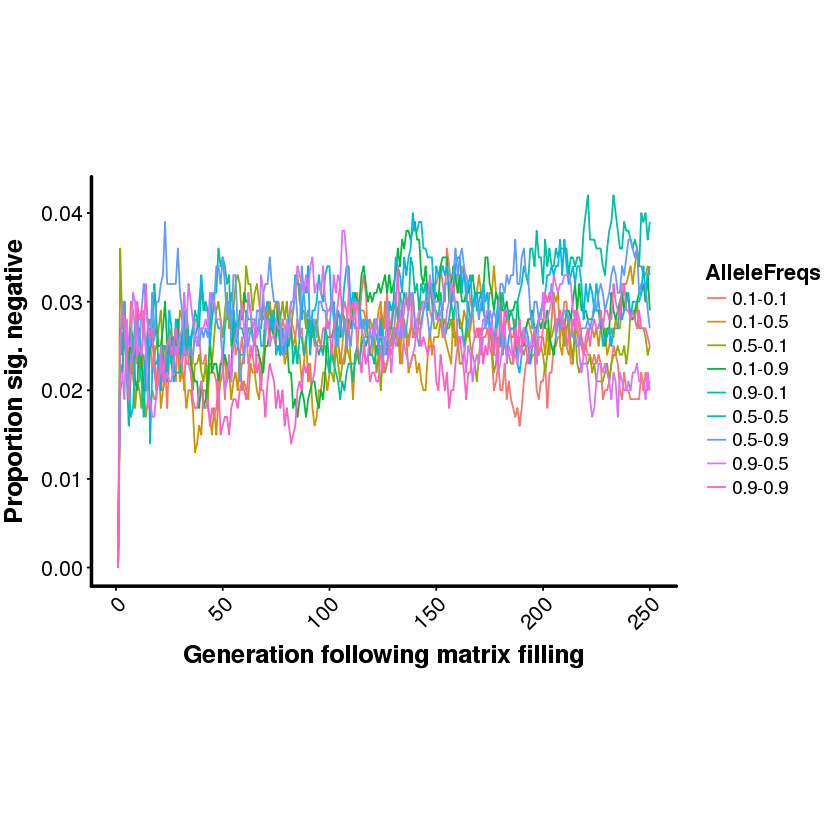

In [22]:
#Plot prop sig neg by generation and Allele Freqs
PropSigNeg_Seq_AlleleFreq_AllFill <- ggplot(datSlopes_AllFill, aes(x = seq, y = prop_sigNeg, 
    group = AlleleFreqs, color = AlleleFreqs)) + 
    ylab("Proportion sig. negative") + xlab("Generation following matrix filling") + 
#     geom_point(size = 1.0, color = "black", position = position_dodge(width = 0.55)) + 
    geom_line(size = 0.5, aes(color = AlleleFreqs)) + 
    ng1.45
PropSigNeg_Seq_AlleleFreq_AllFill 

# One Fill analysis

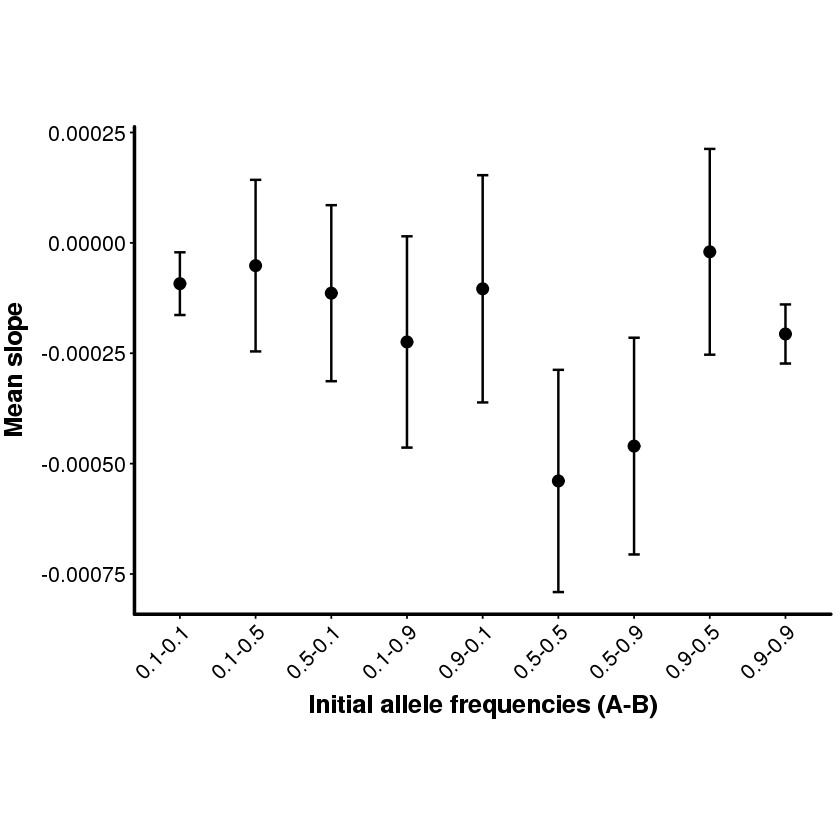

In [7]:
MeanSlope_AlleleFreq_OneFill <- ggplot(datSlopes_OneFill_GenOne, aes(x = AlleleFreqs, y = mean)) + 
    geom_errorbar(aes(ymin = mean - ci_mean, ymax = mean + ci_mean), width=0.15, size=0.7,
    position = position_dodge(width = 0.5)) +
    geom_point(size = 3, position = position_dodge(width = 0.5)) + 
#     geom_line(size = 1, position = position_dodge(width = 0.5)) +
#     scale_shape_manual(labels = c("0", "0.01", "0.05"), values = c(21, 22, 23)) +
#     scale_fill_manual(labels = c("0", "0.01", "0.05"), values = c("white", "grey60", "black")) +
#     scale_linetype_manual(labels = c("0", "0.01", "0.05"), values = c("dotted", "dashed", "solid")) +    
    ylab("Mean slope") + xlab("Initial allele frequencies (A-B)") + ng1.45
MeanSlope_AlleleFreq_OneFill

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


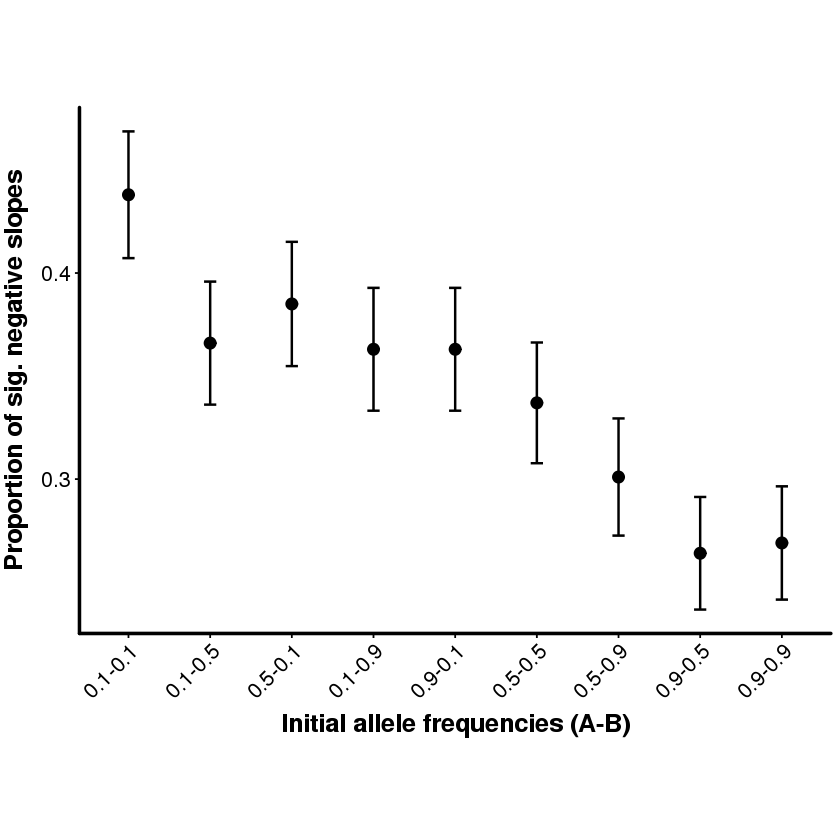

In [8]:
PropSigNeg_AlleleFreq_OneFill <- ggplot(datSlopes_OneFill_GenOne, aes(x = AlleleFreqs, y = prop_sigNeg)) + 
    geom_errorbar(aes(ymin = prop_sigNeg - ci_sigNeg, ymax = prop_sigNeg + ci_sigNeg), width=0.15, size=0.7,
    position = position_dodge(width = 0.5)) +
    geom_point(size = 3, position = position_dodge(width = 0.5)) + 
    geom_line(size = 1, position = position_dodge(width = 0.5)) +
#     scale_shape_manual(labels = c("0", "0.01", "0.05"), values = c(21, 22, 23)) +
#     scale_fill_manual(labels = c("0", "0.01", "0.05"), values = c("white", "grey60", "black")) +
#     scale_linetype_manual(labels = c("0", "0.01", "0.05"), values = c("dotted", "dashed", "solid")) +    
    ylab("Proportion of sig. negative slopes") + xlab("Initial allele frequencies (A-B)")+ ng1.45
PropSigNeg_AlleleFreq_OneFill 

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


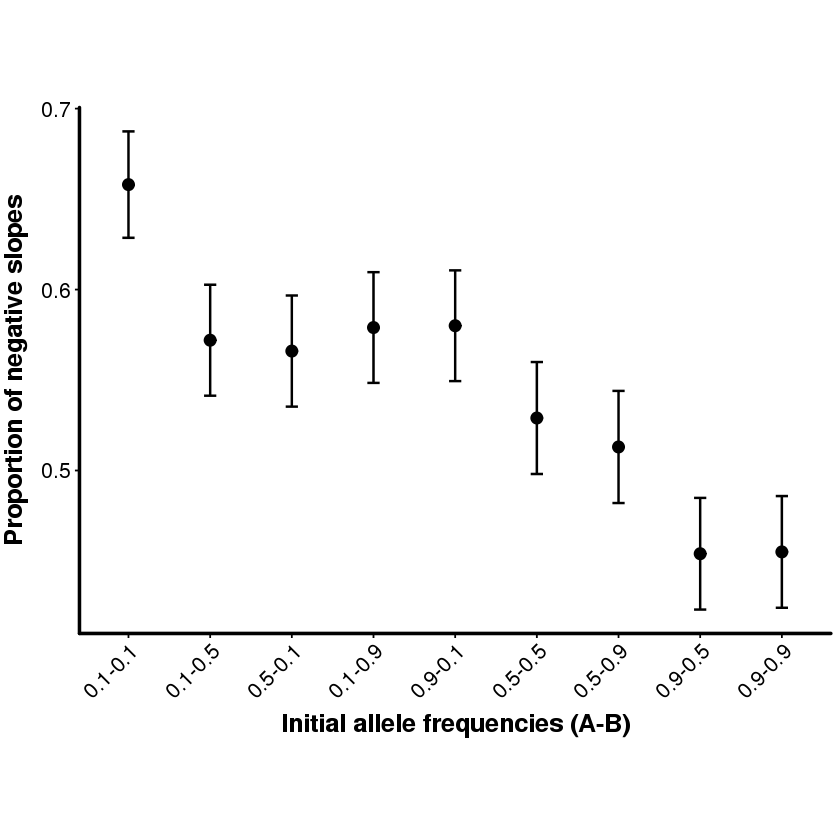

In [9]:
PropNeg_AlleleFreq_OneFill <- ggplot(datSlopes_OneFill_GenOne, aes(x = AlleleFreqs, y = prop_neg)) + 
    geom_errorbar(aes(ymin = prop_neg - ci_neg, ymax = prop_neg + ci_neg), width=0.15, size=0.7,
    position = position_dodge(width = 0.5)) +
    geom_point(size = 3, position = position_dodge(width = 0.5)) + 
    geom_line(size = 1, position = position_dodge(width = 0.5)) +
#     scale_shape_manual(labels = c("0", "0.01", "0.05"), values = c(21, 22, 23)) +
#     scale_fill_manual(labels = c("0", "0.01", "0.05"), values = c("white", "grey60", "black")) +
#     scale_linetype_manual(labels = c("0", "0.01", "0.05"), values = c("dotted", "dashed", "solid")) +    
    ylab("Proportion of negative slopes") + xlab("Initial allele frequencies (A-B)")
PropNeg_AlleleFreq_OneFill + ng1.45

In [14]:
#Extra columns that will be used to create melting dataset for plotting proportion of positive and negative slopes
SlopeSum_AlleleFreq_OneFill_Melt <- dplyr::select(datSlopes_OneFill_GenOne, AlleleFreqs, pA_start, pB_start, prop_sigPos, ci_sigPos, prop_sigNeg,
  ci_sigNeg)

#Melt dataframe
dm1 <- melt(datSlopes_OneFill_GenOne[,c("AlleleFreqs", "prop_sigPos", "ci_sigPos")], 
            id=c("AlleleFreqs", "ci_sigPos"))
dm2 <- melt(datSlopes_OneFill_GenOne[,c("AlleleFreqs", "prop_sigNeg", "ci_sigNeg")], 
            id=c("AlleleFreqs", "ci_sigNeg"))

#Rename columns
setnames(dm1, old = c("ci_sigPos"), new = "ci")
setnames(dm2, old = c("ci_sigNeg"), new = "ci")

#Merge melted dataframes
SlopeSum_AlleleFreq_OneFill_Melt <- rbind(dm1, dm2)
SlopeSum_AlleleFreq_OneFill_Melt

AlleleFreqs,ci,variable,value
0.1-0.1,0.02306180,prop_sigPos,0.166
0.1-0.5,0.02735412,prop_sigPos,0.265
0.1-0.9,0.02665708,prop_sigPos,0.245
0.5-0.1,0.02612313,prop_sigPos,0.231
0.5-0.5,0.02701496,prop_sigPos,0.255
0.5-0.9,0.02845688,prop_sigPos,0.302
0.9-0.1,0.02745232,prop_sigPos,0.268
0.9-0.5,0.02881560,prop_sigPos,0.316
0.9-0.9,0.02871624,prop_sigPos,0.312
0.1-0.1,0.03075114,prop_sigNeg,0.438


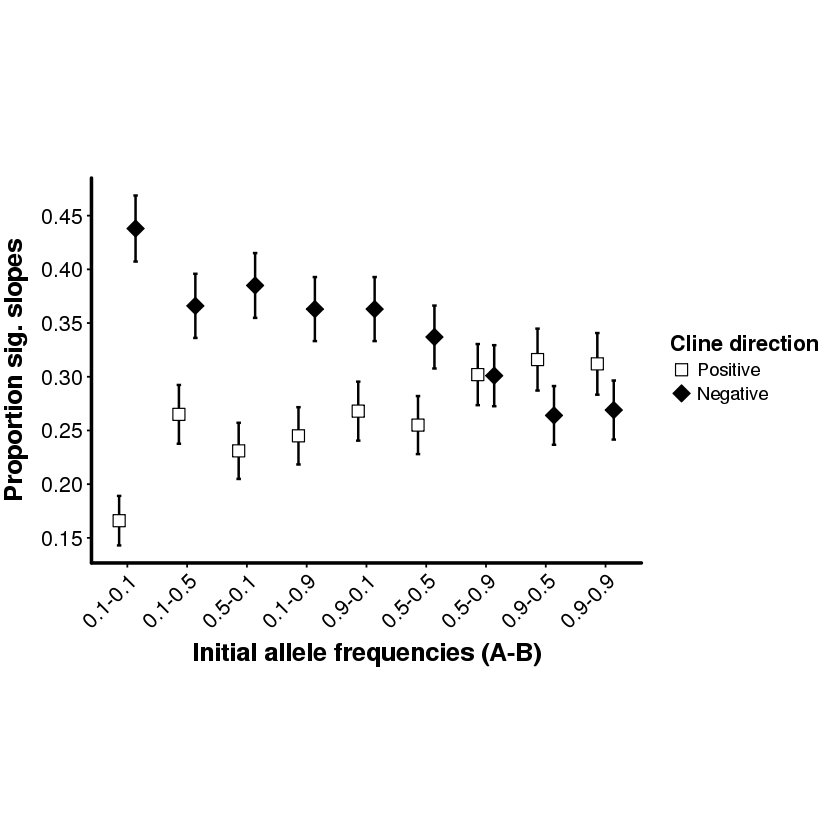

In [19]:
#Plot proportion of significant slopes by migration rate
PropSig_AlleleFreq_OneFill <- ggplot(SlopeSum_AlleleFreq_OneFill_Melt, aes(x = AlleleFreqs, y = value, 
    shape = variable, fill = variable)) + 
    geom_errorbar(aes(ymin = value - ci, ymax = value + ci), width=0.15, size = 0.7, position = position_dodge(width = 0.55)) +
    ylab("Proportion sig. slopes") + xlab("Initial allele frequencies (A-B)") + 
    geom_point(size = 3.5, color = "black", position = position_dodge(width = 0.55)) +
    scale_shape_manual(labels = c("Positive", "Negative"),values=c(22, 23))+
    scale_fill_manual(labels = c("Positive", "Negative"),values=c("white", "black")) +
    scale_y_continuous(breaks = seq(from = 0, to = 1.0, by = 0.05)) +
    labs(shape = 'Cline direction', fill = 'Cline direction') + ng1.45
PropSig_AlleleFreq_OneFill 

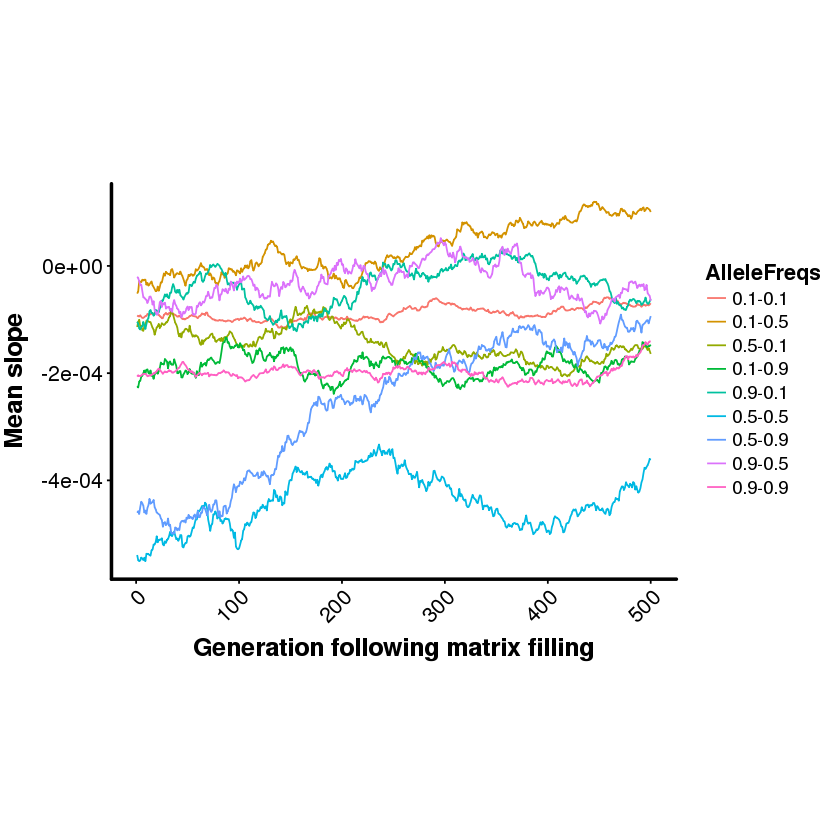

In [20]:
#Plot mean slope by generation and Allele Freqs
MeanSlope_Seq_AlleleFreq_OneFill <- ggplot(datSlopes_OneFill, aes(x = seq, y = mean, 
    group = AlleleFreqs, color = AlleleFreqs)) + 
    ylab("Mean slope") + xlab("Generation following matrix filling") + 
#     geom_point(size = 1.0, color = "black", position = position_dodge(width = 0.55)) + 
    geom_line(size = 0.5, aes(color = AlleleFreqs)) + 
    ng1.45
MeanSlope_Seq_AlleleFreq_OneFill 

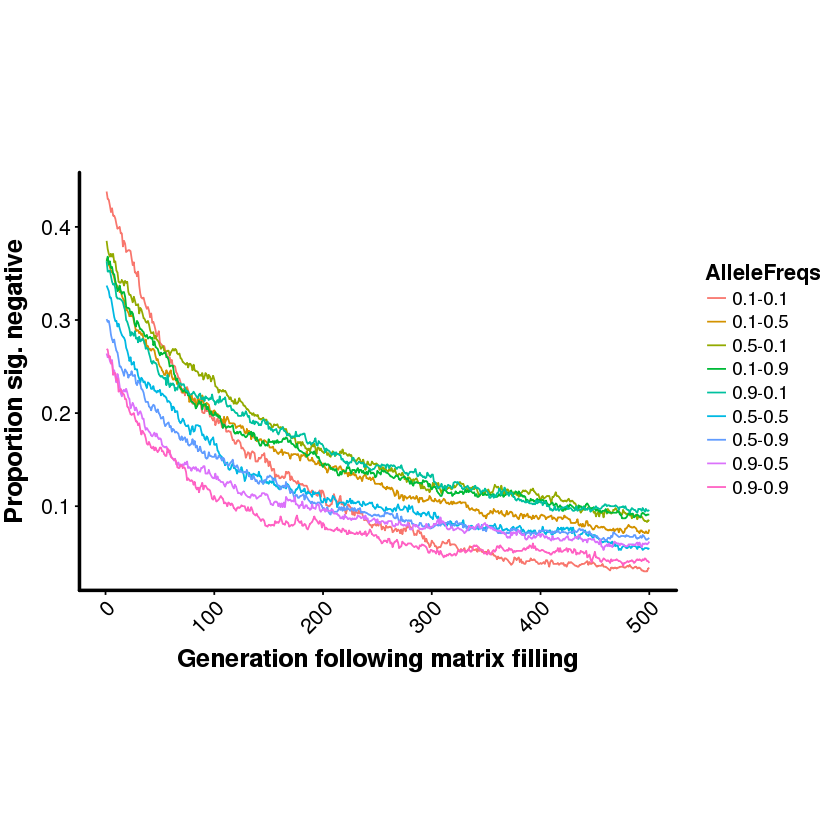

In [23]:
#Plot prop sig neg by generation and Allele Freqs
PropSigNeg_Seq_AlleleFreq_OneFill <- ggplot(datSlopes_OneFill, aes(x = seq, y = prop_sigNeg, 
    group = AlleleFreqs, color = AlleleFreqs)) + 
    ylab("Proportion sig. negative") + xlab("Generation following matrix filling") + 
#     geom_point(size = 1.0, color = "black", position = position_dodge(width = 0.55)) + 
    geom_line(size = 0.5, aes(color = AlleleFreqs)) + 
    ng1.45
PropSigNeg_Seq_AlleleFreq_OneFill 